In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Connect to SQLite database (creates file if not exists)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [3]:
# Create the sales table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

In [4]:
cursor.execute("DELETE FROM sales")

In [5]:
# Insert sample sales data
sample_data = [
    ("Apple", 10, 0.5),
    ("Banana", 5, 0.3),
    ("Apple", 7, 0.5),
    ("Orange", 3, 0.8),
    ("Banana", 8, 0.3),
    ("Orange", 4, 0.8),
    ("Grapes", 6, 1.2),
    ("Mango", 9, 1.5)
]
cursor.executemany(
    "INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", 
    sample_data
)
conn.commit()

In [6]:
# Run SQL query for sales summary
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query, conn)


In [7]:
# print result
print("Sales Data:\n")
print(df)

Sales Data:

  product  total_qty  revenue
0   Apple         17      8.5
1  Banana         13      3.9
2  Grapes          6      7.2
3   Mango          9     13.5
4  Orange          7      5.6


<Figure size 600x400 with 0 Axes>

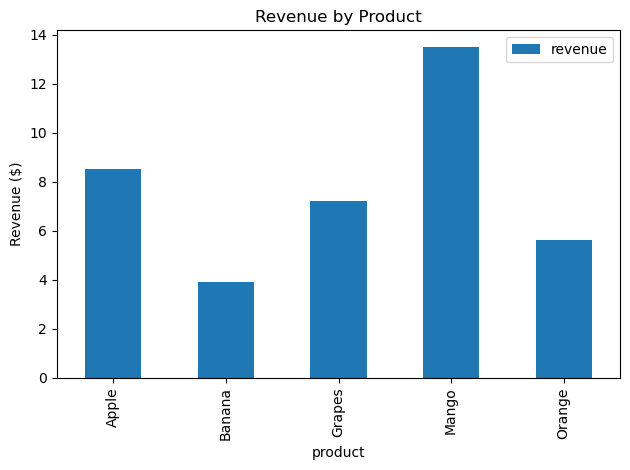

In [10]:
# Plot revenue chart
plt.figure(figsize=(6, 4))
df.plot(kind='bar', x='product', y='revenue')
plt.ylabel("Revenue ($)")
plt.title("Revenue by Product")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()

In [11]:
# Close the database connection
conn.close()
print("Database connection closed.")

Database connection closed.
